Решить уравнение методами половинного деления, простой итерации, Ньютона и секущих. Если корней несколько,
выберете любой нетривиальный.
f(x) = x * log2(x+2) + x^2 - 1

Метод половинного деления (дихотомии) состоит в следующем. 

1)Определяем начальное значение x= (a+b)/2 (как результат деления интервала пополам). 

2)Вычисляем F(x). 

3)Если F(x)>0 и F(a)>0 или F(x)<0 и F(a)<0 (т.е. перемена знака функции F(x) не произошла), 
то задаем a=x (т.е. перемещаем левую границу интервала в середину), уменьшая интервал вдвое и 
исключая при этом левую половину, на которой либо нет корней, либо есть четное число корней, 
иначе задаем b=x (исключаем правую половину интервала).

4)Проверяем условие b-a<eps, если оно выполняется, то возвращаемся к п.1. 
с новыми значениями границ интервала, иначе заканчиваем вычисления и считаем, что последнее значение x и будет 
корнем уравнения с заданной точностью eps. 

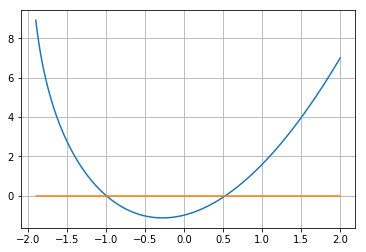

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
 
f = lambda x: x * math.log(x+2)/math.log(2) + x**2 - 1

x = np.linspace(-1.9, 2, 200)

y = [f(i) for i in x]
plt.plot(x,y)
plt.plot(x,np.zeros(len(x)))
plt.grid()
plt.show()

In [3]:
import math

#f = lambda x: x * np.log2(x+2) + x**2 - 1

def showans(x, f):
    print("x1 = ", x[0], "x2 = ", x[1] )
    print("f(x1)= ", f[0], "f(x2)= ", f[1])

def MPD(a, b, eps=0.000001):
    iteration = 0
    while abs(b - a) > eps:
        iteration += 1
        x = (a + b) / 2
        fx = f(x)
        fa = f(a)
        if (fx < 0 and fa < 0) or (fx > 0 and fa > 0):
            a = x
        else:
            b = x
    print("Количество итераций:", iteration)
    return x
 
# first root on [0, 1]
# second root on [-1.5, -0.5]
fr1 = [0, 1]
fr2 = [-1.5, -0.5]
e = 0.001 # точность
print("Метод половинного деления")
x = [MPD(fr1[0], fr1[1], e), MPD(fr2[0], fr2[1], e)]
func = [f(x[0]), f(x[1])]
showans(x, func)

Метод половинного деления
Количество итераций: 10
Количество итераций: 10
x1 =  0.5341796875 x2 =  -1.0009765625
f(x1)=  0.001960044314109455 f(x2)=  0.0033650254624395526


In [4]:
# производная функции f
derivativef = lambda x: x * (1/(x * math.log(2) + math.log(4)) + 2) + math.log(x+2)/math.log(2)

def newton(a, b, eps):
    iteration = 0
    # print(eps)
    x = (a+b)/2
    buf = x - f(x)/derivativef(x)
    while abs(x - buf) > eps:
        iteration +=1
        buf = x
        x = x - f(x)/derivativef(x)
    print("Количество итераций:", iteration)
    return x
                              
print("Метод Ньютона")
e= 0.001 # точность
x = [newton(fr1[0], fr1[1], e), newton(fr2[0], fr2[1], e)]
func = [f(x[0]), f(x[1])]
showans(x, func)

Метод Ньютона
Количество итераций: 2
Количество итераций: 0
x1 =  0.533457430348866 x2 =  -1.0
f(x1)=  6.374321941393646e-07 f(x2)=  0.0


In [16]:
def secant(a, b, eps):
    iteration = 0
    # print(eps)
    x = a
    x_prev = a + 2 * eps
    while abs(x - x_prev) > eps:
        iteration +=1
        x_prev = x
        x = x - f(x)*(x - b) / (f(x) - f(b))
    print("Количество итераций:", iteration)
    return x   

print("Метод секущих")
e= 0.001 # точность
x = [secant(fr1[0], fr1[1], e), secant(fr2[0], fr2[1], e)]
func = [f(x[0]), f(x[1])]
showans(x, func)

Метод секущих
Количество итераций: 6
Количество итераций: 17
x1 =  0.5334032990546811 x2 =  -0.9997252060884021
f(x1)=  -0.00014615157824193759 f(x2)=  -0.0009457927394532772


In [6]:
phi = lambda x: x - f(x)/derivativef(x) 

def simpleit(a, b, eps):
    iteration = 0
    # print(eps)
    x = a
    buf = a + 2*eps
    while abs(x - buf) > eps:
        iteration +=1
        buf = x
        x = phi(x)
    #print(x)
    print("Количество итераций:", iteration)
    return x

print("Метод простой итерации")
e= 0.001 # точность
x = [simpleit(fr1[0], fr1[1], e), simpleit(fr2[0], fr2[1], e)]
func = [f(x[0]), f(x[1])]
showans(x, func)

Метод простой итерации
Количество итераций: 5
Количество итераций: 4
x1 =  0.533457195304146 x2 =  -1.0000001977515183
f(x1)=  3.718092500548664e-11 f(x2)=  6.807982950718383e-07


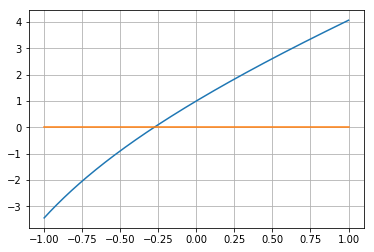

In [18]:
x = np.linspace(-1, 1, 200)
y = [derivativef(i) for i in x]
plt.plot(x,y)
plt.plot(x,np.zeros(len(x)))
plt.grid()
plt.show()

# Задание
Найти на отрезке от [0, 1] найти максимум модуля производной от выражения phi(x) = x - f(x)/f'(x)

Производная равна phi'(x) = 1 -  ( (f'(x))^2 - f(x)*f"(x) )/ (f'(x))^2 = f(x)*f"(x)/(f'(x))^2
Наибольшее значение phi'(x) на [0, 1] принимает в точках phi"(x) = 0 , 0< x <1 или phi(a) или phi(b)

In [21]:
import scipy.optimize

secderf = lambda x: -( math.log(2)*(2*(x**2 - 1) - (3*x**2 + 8*x + 1)* math.log(2 + x) + 2*(2 + x)**2 * math.log(2 + x)**2 ))/((2 + x)**2 * math.log(2 + x)**3)

p = lambda x: f(x)*secderf(x)/derivativef(x)**2

solution = scipy.optimize.minimize_scalar(lambda x: -p(x), bounds=[0,1], method='bounded')
print(solution)


     fun: -0.5986126920690643
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 5.9608609865491405e-06


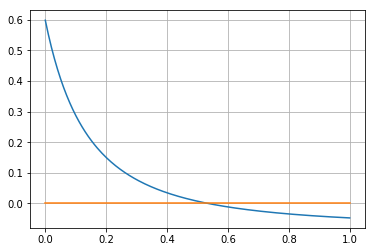

In [13]:
x = np.linspace(0, 1, 200)
y = [p(i) for i in x]
plt.plot(x,y)
plt.plot(x,np.zeros(len(x)))
plt.grid()
plt.show()

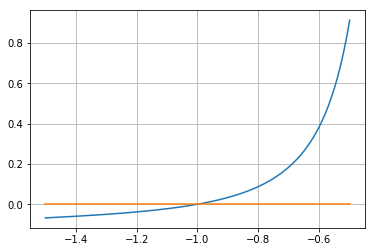

In [19]:
x = np.linspace(-1.5, -0.5, 200)
y = [p(i) for i in x]
plt.plot(x,y)
plt.plot(x,np.zeros(len(x)))
plt.grid()
plt.show()